# Analysing The Data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors
#import seaborn as sns
from scipy.stats import gaussian_kde
# Set up some default matplotlib options
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.cmap'] = 'inferno'

In [2]:
resultsdf = pd.read_csv('lmfitData.csv' )
resultsdf

,t coord,y coord,1394 int,1403 int,success,1394g int,1394g wave,1394 chi,1394 redchi,1394 A1,...,1403 mu1,1403 mu1 stderr,1403 sigma1,1403 sigma1 stderr,1403 A2,1403 A2 stderr,1403 mu2,1403 mu2 stderr,1403 sigma2,1403 sigma2 stderr
0,0.0,288.0,107.25,55.25,1.0,114.056108,139.383595,36.266768,1.208892,109.860847,...,140.283777,0.000725,0.006899,0.000856,10.791884,4.743159,140.294264,0.005751,0.018021,0.003780
1,0.0,289.0,110.25,52.00,1.0,112.619192,139.381665,33.088995,1.102966,36.942924,...,140.283599,0.000533,0.009029,0.000697,1.884292,1.456597,140.260004,26.702087,0.800077,459.772285
2,0.0,290.0,115.50,60.25,1.0,117.596725,139.380131,46.995456,1.566515,33.402122,...,140.283956,0.000643,0.010379,0.000917,1.985867,1.057274,140.320000,0.055356,0.025620,0.083409
3,0.0,291.0,125.50,64.25,1.0,124.639703,139.383249,23.539090,0.784636,94.005863,...,140.292983,0.002586,0.004829,0.002485,53.263340,13.274416,140.281993,0.004638,0.008174,0.002234
4,0.0,292.0,165.25,86.00,1.0,170.283985,139.382803,31.626361,1.054212,34.534372,...,140.282328,0.000827,0.010369,0.000608,0.000011,31.925082,140.292742,42389.836052,0.014900,63993.361887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173395,2039.0,368.0,53.75,25.50,1.0,48.190614,139.378596,34.532407,1.151080,31.114413,...,140.281145,0.000847,0.006304,0.000967,5.872324,1.344303,140.301322,0.007311,0.022209,0.005249
173396,2039.0,369.0,84.25,43.00,1.0,81.215450,139.379685,29.112388,0.970413,45.054419,...,140.282549,0.001377,0.012201,0.002029,5.199344,3.942828,140.310420,0.039934,0.023736,0.024554
173397,2039.0,370.0,142.50,15.50,1.0,141.834026,139.381764,35.664539,1.188818,60.140054,...,140.273889,152268.979775,0.007613,123997.225488,0.000004,67.045641,140.296992,25325.586764,-0.003216,23453.629176
173398,2039.0,371.0,211.25,-200.00,1.0,213.076455,139.383793,106.181754,3.539392,183.832630,...,140.277200,NaN,0.010000,NaN,0.000000,NaN,140.297200,NaN,0.010000,NaN


## Chi Sqr summary

In [3]:
print('1394A Chi Squared statistics')
print('average chi squared = ', np.mean(resultsdf['1394 chi']), ', standard deviation =', np.std(resultsdf['1394 chi']))
print('average reduced chi squared = ', np.mean(resultsdf['1394 redchi']), ', standard deviation =', np.std(resultsdf['1394 redchi']))
#print(np.count_nonzero(resultsdf['1394 chi'][(resultsdf['1394 chi'] < 18.493)]), ' profiles have chi squared < 18.493, the 5% critical value. This represents',
#               round(np.count_nonzero(resultsdf['1394 chi'][(resultsdf['1394 chi'] < 18.493)])/(len(resultsdf['1394 chi'])) * 100, 2), '% of the profiles.')
print('---------------------------------------------------------------------')
print(np.count_nonzero(resultsdf['1394 redchi'][(resultsdf['1394 redchi'] < 1)]), ' profiles have reduced chi squared < 1, implying a very good fit. This represents',
               round(np.count_nonzero(resultsdf['1394 redchi'][(resultsdf['1394 redchi'] < 1)])/(len(resultsdf['1394 redchi'])) * 100, 2), '% of the profiles.')
print(np.count_nonzero(resultsdf['1394 redchi'][(resultsdf['1394 redchi'] < 3)]), ' profiles have reduced chi squared < 3, implying a good fit. This represents',
               round(np.count_nonzero(resultsdf['1394 redchi'][(resultsdf['1394 redchi'] < 3)])/(len(resultsdf['1394 redchi'])) * 100, 2), '% of the profiles.')
print(np.count_nonzero(resultsdf['1394 redchi'][(resultsdf['1394 redchi'] < 8.151261614031625)]), ' profiles have reduced chi squared under the average value. This represents',
               round(np.count_nonzero(resultsdf['1394 redchi'][(resultsdf['1394 redchi'] < 8.151261614031625)])/(len(resultsdf['1394 redchi'])) * 100, 2), '% of the profiles.')

1394A Chi Squared statistics
average chi squared =  244.5378484209578 , standard deviation = 1420.8499482032198
average reduced chi squared =  8.151261614031625 , standard deviation = 47.36166494010647
---------------------------------------------------------------------
20055  profiles have reduced chi squared < 1, implying a very good fit. This represents 11.57 % of the profiles.
118995  profiles have reduced chi squared < 3, implying a good fit. This represents 68.62 % of the profiles.
150306  profiles have reduced chi squared under the average value. This represents 86.68 % of the profiles.


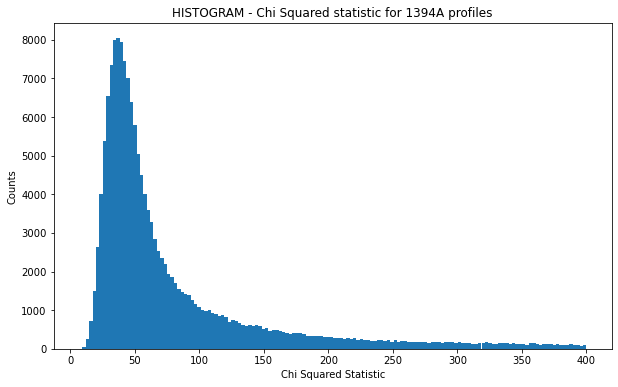

In [4]:
#plt.hist(resultsdf['1394 chi'][(resultsdf["1394 int"] < 16182) & (resultsdf["1394 int"] > 0) & (resultsdf["1403 int"] < 16182) & 
#                               (resultsdf["1403 int"] > 0)], 100)
plt.hist(resultsdf['1394 chi'][(resultsdf["1394 chi"] < 400)], 150)
plt.title('HISTOGRAM - Chi Squared statistic for 1394A profiles')
plt.ylabel('Counts')
plt.xlabel('Chi Squared Statistic')
plt.show()

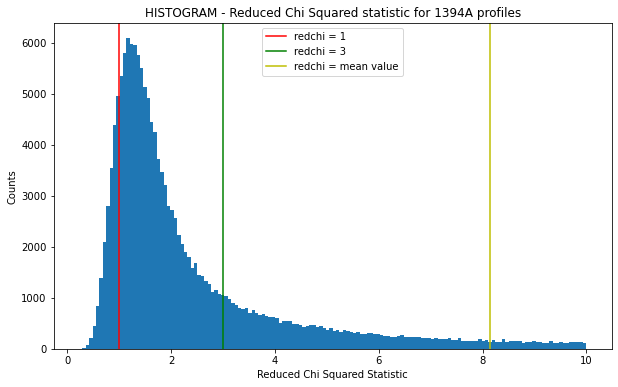

In [5]:
plt.hist(resultsdf['1394 redchi'][(resultsdf["1394 redchi"] < 10)], 150)
plt.title('HISTOGRAM - Reduced Chi Squared statistic for 1394A profiles')
plt.ylabel('Counts')
plt.xlabel('Reduced Chi Squared Statistic')
plt.axvline(x=1, label='redchi = 1', color = 'r')
plt.axvline(x=3, label='redchi = 3', color = 'g')
plt.axvline(x=8.151261614031625, label='redchi = mean value', color = 'y')
plt.legend()
plt.show()

## Various Graphs

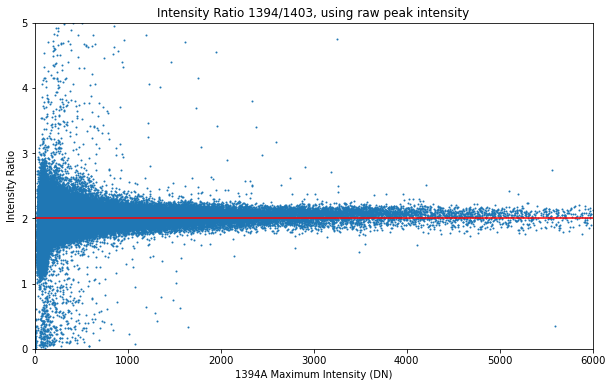

In [6]:
plt.scatter(resultsdf['1394 int'],resultsdf['1394 int']/resultsdf['1403 int'], s=1)
plt.title('Intensity Ratio 1394/1403, using raw peak intensity')
plt.ylabel('Intensity Ratio')
plt.xlabel('1394A Maximum Intensity (DN)')
plt.axhline(y=2, color='r', linestyle='-')
plt.axis([0, 6000, 0, 5])
plt.show()

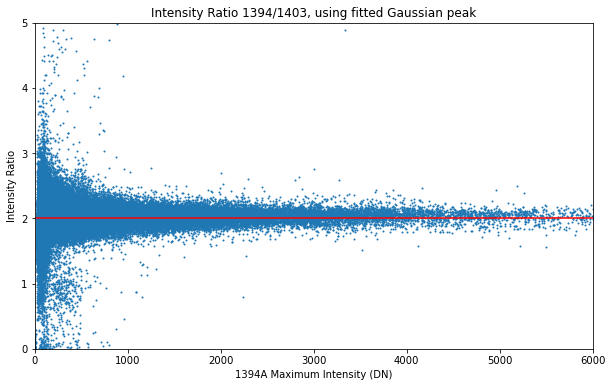

In [7]:
plt.scatter(resultsdf['1394g int'],resultsdf['1394g int']/resultsdf['1403g int'], s=1)
plt.title('Intensity Ratio 1394/1403, using fitted Gaussian peak')
plt.ylabel('Intensity Ratio')
plt.xlabel('1394A Maximum Intensity (DN)')
plt.axhline(y=2, color='r', linestyle='-')
plt.axis([0, 6000, 0, 5])
plt.show()

In [ ]:
# Seaborn test

# sns.set_theme(style="white")
# ratio = resultsdf['1394g int']/resultsdf['1403g int']
# g = sns.JointGrid(data=resultsdf, x="1394g int", y=ratio, space=0)
# g.plot_joint(sns.kdeplot,
             # fill=True, clip=((0, 6000), (0, 5)),
             # thresh=0, levels=100, cmap="rocket")
# g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=200)

ratio = resultsdf['1394g int']/resultsdf['1403g int']
# Calculate the point density

xy = np.vstack([resultsdf['1394g int'],ratio])
print(xy)
xy = xy[xy < np.inf]
print(xy)
#print(np.count_nonzero(xy[(xy = np.inf)]))
z = gaussian_kde(xy)(xy)



173400 173400 342388


ValueError: 'c' argument has 342388 elements, which is inconsistent with 'x' and 'y' with size 173400.

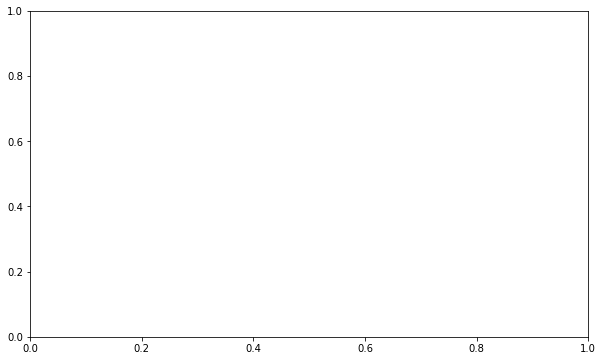

In [19]:
print(len(resultsdf['1394g int']), len(ratio), len(z))
fig, ax = plt.subplots()
ax.scatter(resultsdf['1394g int'], ratio, c=z, s=100)
plt.show()

1000 1000
1000


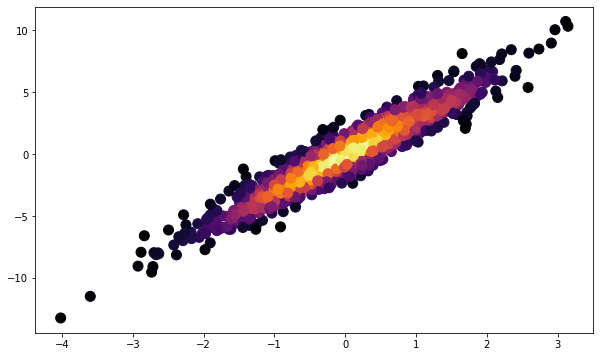

In [16]:
# Generate fake data
x = np.random.normal(size=1000)
y = x * 3 + np.random.normal(size=1000)
print(len(x), len(y))
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
print(len(z))
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()

In [ ]:
#plt.figure(figsize=[20,15])
plt.scatter(resultsdf['1394g int'],resultsdf['1394g int']/resultsdf['1403g int'], s=1, cmap='hot', c=resultsdf['1394 redchi'], norm=colors.LogNorm())
plt.title('Intensity Ratio 1394/1403, using fitted Gaussian peak - coloured by Reduced Chi squared')
plt.ylabel('Intensity Ratio')
plt.xlabel('1394A Maximum Intensity (DN)')
plt.axhline(y=2, color='r', linestyle='-')
cbar = plt.colorbar()
plt.axis([0, 6000, 0, 5])
plt.show()

In [ ]:
# preliminary
plt.scatter(resultsdf['1394 A1'],resultsdf['1394 A1']/resultsdf['1403 A1'], s=1)
plt.title('I1 Ratio 1394/1403, using fitted Gaussian peak')
plt.ylabel('Intensity Ratio')
plt.xlabel('1394A Maximum Intensity (DN)')
plt.axhline(y=2, color='r', linestyle='-')
plt.axis([0, 6000, 0, 10])
plt.show()

In [ ]:
plt.scatter(resultsdf['1394 int'],resultsdf['1394 int']/resultsdf['1403 int'], s=1, c=resultsdf['success'], cmap='Greys_r', facecolor=(1, 1, 1))
plt.title('Intensity Ratios where both spectral lines were successfully fitted with Gaussians')
plt.ylabel('Intensity Ratio')
plt.xlabel('1394A Maximum Intensity (DN)')
plt.axhline(y=2, color='r', linestyle='-')
plt.xscale("log")
plt.axis([10, 10000, 0.1, 4])

plt.show()

In [ ]:
#plt.figure(figsize=[20,15])
# plot with colourmap - comment out the unwanted plt.scatter command
plt.scatter(resultsdf['t coord'], resultsdf['y coord'], s=1, c=resultsdf['1394g int'], cmap='RdYlBu', facecolor=(1, 1, 1))
# plot without colourmap
#plt.scatter(ratio_array[:, :, 0], ratio_array[:, :, 0]/ratio_array[:, :, 1], s=1)
plt.axhline(y=2, color='r', linestyle='-')
plt.axis([0, 2040, 287, 380]) # control the axes
plt.xlabel('Time coordinate')
plt.ylabel('Slit position')
plt.title('Data points where both spectral lines can be fitted with a double Gaussian')
# colourbar section
cbar = plt.colorbar()
plt.show()

In [ ]:
#plt.scatter(resultsdf['1394g wave']-139.3757, resultsdf['1394g int'], s=2, cmap='RdYlGn', c=resultsdf['success'])
plt.scatter(resultsdf['1394g wave']-139.3757, resultsdf['1394g int'], s=2, cmap='Greys', c=resultsdf['success'])
plt.title('Fitted Gaussians on 1394 profile: Amplitude vs Central wavelength')
plt.ylabel('Amplitude of Fit (DN)')
plt.xlabel('Wavelength (Offset from reference) (nm)')
plt.axis([-0.05, 0.08, 10, 5000])
#plt.yscale('log')
plt.axvline(x=0, color='b', linestyle='-')
cbar = plt.colorbar()
plt.show()

In [ ]:
plt.scatter(resultsdf['1403g wave']-140.2772, resultsdf['1403g int'], s=2)#, cmap='RdYlGn', c=resultsdf['success'])
plt.title('Fitted Gaussians on 1403 profile: Amplitude vs Central wavelength')
plt.ylabel('Amplitude of Fit (DN)')
plt.xlabel('Wavelength (Offset from reference) (nm)')
plt.axis([-0.05, 0.05, 1, 5000])
#plt.yscale('log')
plt.axvline(x=0, color='b', linestyle='-')
#cbar = plt.colorbar()
plt.show()

In [ ]:
x45 = np.arange(0, 17000)

plt.scatter(resultsdf['1394 int'], resultsdf['1394g int'], s=1, cmap='RdYlGn', c=resultsdf['success'])
plt.plot(x45,x45, color='pink')
plt.title('1394A Profile - Fitted Max Intensity vs Raw Recorded Intensity')
plt.xlabel('1394A peak intensity')
plt.ylabel('1394A Gaussian fitted peak')
plt.axvline(x=0, color='b', linestyle='-')
plt.axhline(y=0, color='b', linestyle='-')
plt.show()

In [ ]:
x45 = np.arange(0, 17000)

plt.scatter(resultsdf['1403 int'], resultsdf['1403g int'], s=1)
plt.plot(x45,x45, color='r')
plt.title('1403 Profile - Fitted Max Intensity vs Raw Recorded Intensity')
plt.xlabel('1403 peak intensity')
plt.ylabel('1403 Gaussian fitted peak')
plt.axvline(x=0, color='b', linestyle='-')
plt.axhline(y=0, color='b', linestyle='-')
plt.show()

In [ ]:
x45 = np.arange(0, 17000)

plt.scatter(resultsdf['1394g int'], resultsdf['1394 A1'], s=1, label='1st component')
plt.scatter(resultsdf['1394g int'], resultsdf['1394 A2'], s=1, c='orange', label='2nd component')
plt.plot(x45,x45, color='r')
plt.title('1394A Profile - Amplitudes of sub-Gaussians vs Total Gaussian amplitude')
plt.xlabel('1394A peak intensity')
plt.ylabel('1394A Gaussian fitted peak')
plt.axvline(x=0, color='b', linestyle='-')
plt.axhline(y=0, color='b', linestyle='-')
plt.legend()
#plt.yscale("log")
#plt.xscale("log")
plt.axis([10, 3000, -100, 3000])
plt.show()

In [ ]:
x45 = np.arange(0, 17000)

plt.scatter(resultsdf['1403g int'], resultsdf['1403 A1'], s=1, label='1st component')
plt.scatter(resultsdf['1403g int'], resultsdf['1403 A2'], s=1, c='orange', label='2nd component')
#plt.scatter(resultsdf['1403g int'], resultsdf['1403g3 int'], s=1, c='green', label='3rd component')
plt.plot(x45,x45, color='r')
plt.legend()
plt.title('1403A Profile - Amplitudes of sub-Gaussians vs Total Gaussian amplitude')
plt.xlabel('1403A peak intensity')
plt.ylabel('1403A Gaussian fitted peak')
plt.axvline(x=0, color='b', linestyle='-')
plt.axhline(y=0, color='b', linestyle='-')
#plt.yscale("log")
#plt.xscale("log")
plt.axis([10, 400, 0.01, 500])
plt.show()

In [ ]:
sep1394 = resultsdf['1394 mu2'] - resultsdf['1394 mu1']

plt.hist(sep1394*10, 500)
plt.title('Histogram - Separation of Gaussian sub-components in 1394A profile')
plt.ylabel('Counts')
plt.xlabel('Separation (Angstroms)')
plt.grid(which='major')
plt.axis([-0.4,0.42,0,8000])
plt.show()

In [ ]:
sep1403 = resultsdf['1403 mu2'] - resultsdf['1403 mu1']

plt.hist(sep1403*10, 500)
plt.title('Histogram - Separation of Gaussian sub-components in 1403A profile')
plt.ylabel('Counts')
plt.xlabel('Separation (Angstroms)')
plt.grid(which='major')
plt.axis([-0.4,0.45,0,8000])
plt.show()

In [ ]:
subRatio1394 = resultsdf['1394 A2']/resultsdf['1394 A1']

plt.scatter(resultsdf['1394g int'], subRatio1394, s=1)
plt.title('Scatter - Ratio of Gaussian sub-component intensity in 1394A profile')
plt.ylabel('Ratio of Sub-component Amplitudes')
plt.xlabel('Total fitted intensity')
plt.grid(which='major')
#plt.yscale('log')
#plt.xscale('log')
plt.axis([10,20000,0.0001,7])
plt.show()

In [ ]:
plt.scatter(resultsdf['1394g wave'], resultsdf['1403g wave'], s=1)
plt.title('SCATTER - fitted wavelengths of 1394 against 1403 lines')
plt.show()